### Next steps:

1) do one-hot encoding with the job titles. Create a new column with job title/industry id 

2) Once we get this, we'll be able to group by ids, and not job titles

In [30]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

from matplotlib import cm
import numpy as np
from itertools import cycle, islice

In [2]:
db = '../employment_data.db'
conn = sql.connect(db)

In [3]:
df = pd.read_sql_query("SELECT * FROM employment_data;", conn)

DatabaseError: Execution failed on sql 'SELECT * FROM employment_data;': no such table: employment_data

In [ ]:
df

In [ ]:
conn.close()

In [ ]:
df.info()

In [ ]:
df['description'] = df['description'].str.replace('\n', ' ')

In [ ]:
df

## Converting Title names and Descriptions to lowercase

In [ ]:
def lowercase(col):
    return list(map(lambda x: x.lower(), df[col]))

df['lowercase_title'] = lowercase('title')
df['lowercase_description'] = lowercase('description')

In [ ]:
df

In [ ]:
a = df.groupby(['location_category','job_category']).count()
a

In [ ]:
df.info()

In [ ]:
df.to_csv('updated_categories_employment_data.csv', index = False)

# Reading csv as a dataframe

In [31]:
df_new = pd.read_csv('updated_categories_employment_data.csv') 

In [32]:
df_new

,title,company_name,location,via,job_category,location_category,description,schedule_type,job_id
0,Software Engineer - All levels,Bubble,"New York, NY",via AngelList,software engineer,new york city,"For 95% of programming jobs, the primary focus...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...
1,"Software Engineer - Apple Media Products, Core...",Apple,"New York, NY",via Careers At Apple,software engineer,new york city,"Summary Posted: May 24, 2021 Role Number:2002...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...
2,Software Engineer,Robinhood,"New York, NY",via LinkedIn,software engineer,new york city,Join a leading fintech company that’s democrat...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...
3,Software Engineer III,Google,"New York, NY (+1 other)",via LinkedIn,software engineer,new york city,Note: By applying to this position you will ha...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciBJSU...
4,Software Engineer,Capital One,"New York, NY",via Capital One Careers,software engineer,new york city,"Locations: NY - New York, United States of Ame...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...
...,...,...,...,...,...,...,...,...,...
7333,UX Designer-Remote,"PDS Tech, Inc.","Atlanta, GA",via TopTechJobs,UI/UX designer,atlanta georgia,You need to be highly collaborative and able t...,Full-time,eyJqb2JfdGl0bGUiOiJVWCBEZXNpZ25lci1SZW1vdGUiLC...
7334,UX Designer,Jobleads,"Atlanta, GA",via Jobilize,UI/UX designer,atlanta georgia,Welcome to the Anthem Careers site! We have be...,Full-time,eyJqb2JfdGl0bGUiOiJVWCBEZXNpZ25lciIsImNvbXBhbn...
7335,Senior UI Creative Designer,Capgemini,"Atlanta, GA",via ZipRecruiter,UI/UX designer,atlanta georgia,Capgemini is a looking for a Senior UI / Creat...,Full-time,eyJqb2JfdGl0bGUiOiJTZW5pb3IgVUkgQ3JlYXRpdmUgRG...
7336,"Senior UX Designer, Digital Transformation - R...",IHS Markit,"Atlanta, GA",via IHS Markit,UI/UX designer,atlanta georgia,Position Summary As a key player in the digit...,Full-time,eyJqb2JfdGl0bGUiOiJTZW5pb3IgVVggRGVzaWduZXIsIE...


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7338 entries, 0 to 7337
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              7338 non-null   object
 1   company_name       7338 non-null   object
 2   location           7322 non-null   object
 3   via                7338 non-null   object
 4   job_category       7338 non-null   object
 5   location_category  7338 non-null   object
 6   description        7338 non-null   object
 7   schedule_type      7288 non-null   object
 8   job_id             7338 non-null   object
dtypes: object(9)
memory usage: 516.1+ KB


In [33]:
df_new['job_category'].unique()

array(['software engineer', 'data analyst', 'web developer',
       'data scientist', 'front-end developer', 'back-end developer',
       'UI/UX designer'], dtype=object)

In [8]:
df_new['location_category'].unique()

array(['new york city', 'newark new jersey', 'los angeles california',
       'atlanta georgia'], dtype=object)

In [9]:
df_new['schedule_type'].unique()

array(['Full-time', 'Contractor', 'Internship', nan, 'Full–time',
       'Part-time'], dtype=object)

# Let's do a pie chart of the schedule type of jobs overall

### Here I am removing all the null values

In [34]:
df_schedule_type = df_new[~df_new['schedule_type'].isna()]

#df_schedule_type = df_new[(~df_new['schedule_type'].isna()) & (df_new['job_category'] == 'UI/UX designer')]


In [ ]:
df_schedule_type.info()

In [35]:
df_schedule_type['schedule_type'] = df_schedule_type['schedule_type'].replace('Full–time', 'Full-time')

<ipython-input-35-cc74a8d310c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_schedule_type['schedule_type'] = df_schedule_type['schedule_type'].replace('Full–time', 'Full-time')


In [12]:
df_schedule_type.head()

,title,company_name,location,via,job_category,location_category,description,schedule_type,job_id
0,Software Engineer - All levels,Bubble,"New York, NY",via AngelList,software engineer,new york city,"For 95% of programming jobs, the primary focus...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...
1,"Software Engineer - Apple Media Products, Core...",Apple,"New York, NY",via Careers At Apple,software engineer,new york city,"Summary Posted: May 24, 2021 Role Number:2002...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciAtIE...
2,Software Engineer,Robinhood,"New York, NY",via LinkedIn,software engineer,new york city,Join a leading fintech company that’s democrat...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...
3,Software Engineer III,Google,"New York, NY (+1 other)",via LinkedIn,software engineer,new york city,Note: By applying to this position you will ha...,Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciBJSU...
4,Software Engineer,Capital One,"New York, NY",via Capital One Careers,software engineer,new york city,"Locations: NY - New York, United States of Ame...",Full-time,eyJqb2JfdGl0bGUiOiJTb2Z0d2FyZSBFbmdpbmVlciIsIm...


In [40]:
df_schedule_type['schedule_type'].unique()

array(['Full-time', 'Contractor', 'Internship', 'Part-time'], dtype=object)

In [43]:
#df for pie chart

pie_schedule_type = df_schedule_type.groupby('schedule_type', as_index=False).count()
pie_schedule_type

,schedule_type,title,company_name,location,via,job_category,location_category,description,job_id
0,Contractor,231,231,230,231,231,231,231,231
1,Full-time,6986,6986,6972,6986,6986,6986,6986,6986
2,Internship,28,28,28,28,28,28,28,28
3,Part-time,43,43,43,43,43,43,43,43


In [37]:
#this is for bar charts

schedule_type = df_schedule_type.groupby(['job_category', 'schedule_type'], as_index=False).count()
y1 = schedule_type[schedule_type['schedule_type'] == 'Part-time']
# y2 = schedule_type[schedule_type['schedule_type'] == 'Internship']['title']
# y3 = schedule_type[schedule_type['schedule_type'] == 'Part-time']
# # print(y2)
print(y1)

           job_category schedule_type  title  company_name  location  via  \
3        UI/UX designer     Part-time      5             5         5    5   
7    back-end developer     Part-time      4             4         4    4   
11         data analyst     Part-time      9             9         9    9   
15       data scientist     Part-time      3             3         3    3   
19  front-end developer     Part-time      9             9         9    9   
26        web developer     Part-time     13            13        13   13   

    location_category  description  job_id  
3                   5            5       5  
7                   4            4       4  
11                  9            9       9  
15                  3            3       3  
19                  9            9       9  
26                 13           13      13  


In [38]:
schedule_type

,job_category,schedule_type,title,company_name,location,via,location_category,description,job_id
0,UI/UX designer,Contractor,38,38,38,38,38,38,38
1,UI/UX designer,Full-time,751,751,749,751,751,751,751
2,UI/UX designer,Internship,6,6,6,6,6,6,6
3,UI/UX designer,Part-time,5,5,5,5,5,5,5
4,back-end developer,Contractor,31,31,31,31,31,31,31
5,back-end developer,Full-time,701,701,701,701,701,701,701
6,back-end developer,Internship,1,1,1,1,1,1,1
7,back-end developer,Part-time,4,4,4,4,4,4,4
8,data analyst,Contractor,23,23,23,23,23,23,23
9,data analyst,Full-time,1023,1023,1020,1023,1023,1023,1023


In [17]:
y1

,job_category,schedule_type,title,company_name,location,via,location_category,description,job_id
0,UI/UX designer,Contractor,38,38,38,38,38,38,38
4,back-end developer,Contractor,31,31,31,31,31,31,31
8,data analyst,Contractor,23,23,23,23,23,23,23
12,data scientist,Contractor,7,7,7,7,7,7,7
16,front-end developer,Contractor,85,85,85,85,85,85,85
20,software engineer,Contractor,9,9,9,9,9,9,9
23,web developer,Contractor,38,38,37,38,38,38,38


In [19]:
y1['title']

0     38
4     31
8     23
12     7
16    85
20     9
23    38
Name: title, dtype: int64

In [ ]:
schedule_type.head()

### Note: software engineer does not have a part time schedule type in their roles, so it might give us an error 

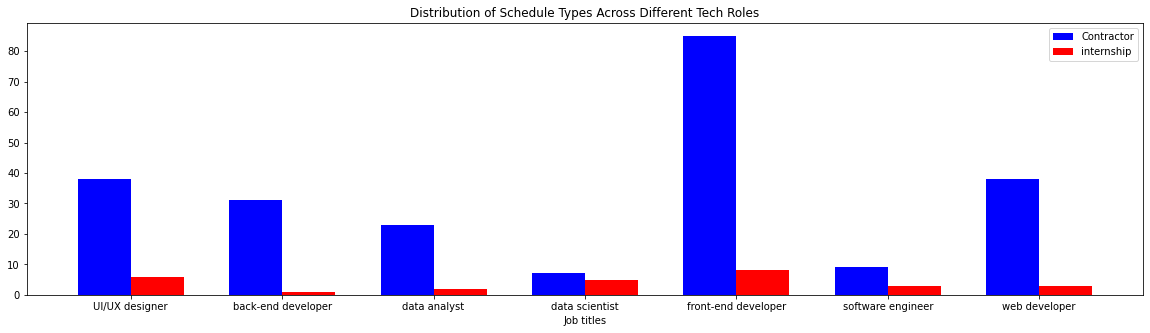

In [20]:
fig, axes = plt.subplots(figsize=(20,5))
x = schedule_type[schedule_type['schedule_type'] == 'Contractor']['job_category'] 
y1 = schedule_type[schedule_type['schedule_type'] == 'Contractor']['title']
y2 =  schedule_type[schedule_type['schedule_type'] == 'Internship']['title']
labels = schedule_type[schedule_type['schedule_type'] == 'Contractor']['job_category'] 

m = np.arange(7)
width = 0.35
axes.bar(m - width/2,y1, label = 'Contractor', width = width, color = 'blue')
axes.bar(m + width/2, y2, label = 'internship', width = width, color = 'red')
# labels = axes.get_xticklabels()
axes.set_xticks(m)
axes.set_xticklabels(labels)
axes.set(xlabel='Job titles', label='frequency',\
       title="Distribution of Schedule Types Across Different Tech Roles")
plt.legend()
plt.show()

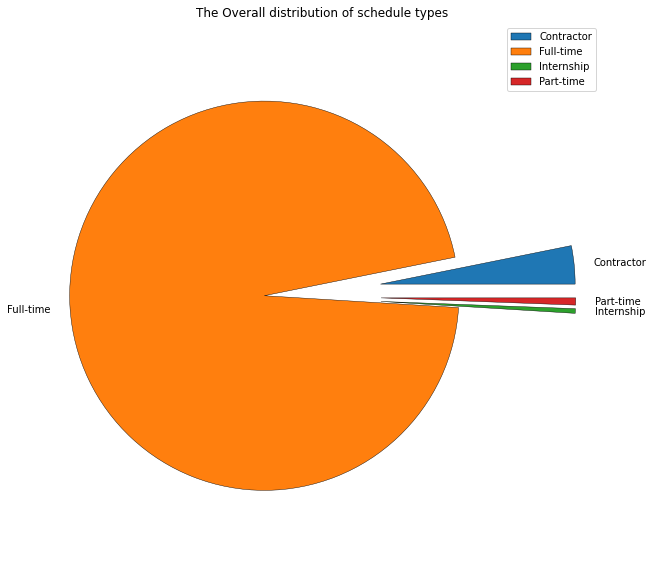

In [44]:
fig, axes = plt.subplots(figsize = (10,10))
axes.pie(pie_schedule_type['title'], labels = pie_schedule_type['schedule_type'], explode = (0.6, 0, 0.6, 0.6),
        wedgeprops= {"edgecolor":"black",
                     'linewidth': 0.4,
                     'antialiased': True})
axes.set(title ='The Overall distribution of schedule types')
axes.axis('equal')
plt.legend() 

plt.show()

Would be great to have a bar graph displaying the number of schedule types per job title
x: job titles
y: number of job postings

  |
  | have four graphs 
  |
  |
  |_____________________________________________________________________________
      software engineer    data analyst    data scientist  ...

# Need to create a dictionary with the count of technologies per job title, per city

## Let's do all of the jobs in NY

In [ ]:
def job_postings(job_category, location):
    return df_new[(df_new['job_category'] == job_category) & (df_new['location_category'] == location)]

### Getting all job postings for each job title

In [ ]:
software_engineer_ny = job_postings('software engineer', 'new york city')
data_analyst_ny = job_postings('data analyst', 'new york city')
web_developer_ny = job_postings('web developer', 'new york city')
data_scientist_ny = job_postings('data scientist', 'new york city')
front_end_developer_ny = job_postings('front-end developer', 'new york city')
back_end_developer_ny = job_postings('back-end developer', 'new york city')
uiux_designer_ny = job_postings('UI/UX designer', 'new york city')

In [ ]:
# software_engineer_ny = df_new[(df_new['job_category'] == 'software engineer') & (df_new['location_category'] == 'new york city')]
# software_engineer_ny

In [ ]:
# software_engineer_ny['lowercase_description'].values

In [ ]:
all_technologies = ['python', 'ruby', 'scala', 'java', 'javascript', 'html', 'css', 'aws', 'node js',
                    'c#', 'c++', 'git', 'github', 'sql', 'mysql', 'postgresql', 'oracle'
                   'linux', 'hadoop',  'scala', 'spark', 'nosql', 'rest apis', 'node.js', 
                   'mongodb', 'docker', 'kubernetes', 'terraform', 'teamcity', 'angular js', 'ides', 'bash'
                   'http', 'react', 'angular', 'vue.js', 'apache cassandra', 'cloud services', 'oop', 'funcitonal programming'
                   'bsa/aml', 'object-oriented programming', 'ssl certificates', 'version control system',
                   'microsoft excel', 'power bi', 'stata', 'sas', 'web intelligence', 'tableau', 'snowflake',
                   'redshift', 'looker', 'braze', 'adobe', 'r programming', 'microsoft office', 'airflow', 'databricks', 'etl', 
                   'machine learning', 'powerpoint', 'matlab', 'apache shark', 'perl', 'statistics', 'matplotlib', 'pandas',
                   'numpy', 'ggplot', 'bokeh', 'flask', 'django', 'd3.js', 'scikit-learn', 'tensorflow', 'pytorch', 'nlp',
                   'meteor', '.net', 'laravel', 'zend', 'yii', 'php', 'elixir', 'express.js', 'figma']

In [ ]:
class Jobs:
    def __init__(self):
        self.tech = {}
        
    def append_tech(self, series):
        all_technologies = ['python', 'ruby', 'scala', 'java', 'javascript', 'html', 'css', 'aws', 'node js',
                    'c#', 'c++', 'git', 'github', 'sql', 'mysql', 'postgresql', 'oracle'
                   'linux', 'hadoop',  'scala', 'spark', 'nosql', 'rest apis', 'node.js', 
                   'mongodb', 'docker', 'kubernetes', 'terraform', 'teamcity', 'angular js', 'ides', 'bash'
                   'http', 'react', 'angular', 'vue.js', 'apache cassandra', 'cloud services', 'oop', 'funcitonal programming'
                   'bsa/aml', 'object-oriented programming', 'ssl certificates', 'version control system',
                   'microsoft excel', 'power bi', 'stata', 'sas', 'web intelligence', 'tableau', 'snowflake',
                   'redshift', 'looker', 'braze', 'adobe', 'r programming', 'microsoft office', 'airflow', 'databricks', 'etl', 
                   'machine learning', 'powerpoint', 'matlab', 'apache shark', 'perl', 'statistics', 'matplotlib', 'pandas',
                   'numpy', 'ggplot', 'bokeh', 'flask', 'django', 'd3.js', 'scikit-learn', 'tensorflow', 'pytorch', 'nlp',
                   'meteor', '.net', 'laravel', 'zend', 'yii', 'php', 'elixir', 'express.js', 'figma']
        
        #going through each individual string in the job description column
        for string in series.values:
            for technology in all_technologies:
                if technology in string:
                    self.tech[technology] = self.tech.get(technology, 0) + 1
#                     if tech not in self.tech.keys():
#                         self.tech[tech] = 1
#                     else:
#                         self.tech[tech] += 1

                    

### Getting the dictionary of techologies for our 7 job titles in NY

In [ ]:
software_engineerny = Jobs()
software_engineerny.append_tech(software_engineer_ny['lowercase_description'])
software_engineerny.tech

data_analystny = Jobs()
data_analystny.append_tech(data_analyst_ny['lowercase_description'])
data_analystny.tech

data_scientistny = Jobs()
data_scientistny.append_tech(data_scientist_ny['lowercase_description'])
data_scientistny.tech

web_developerny = Jobs()
web_developerny.append_tech(web_developer_ny['lowercase_description'])
web_developerny.tech

frontend_developerny = Jobs()
frontend_developerny.append_tech(front_end_developer_ny['lowercase_description'])
frontend_developerny.tech

backend_developerny = Jobs()
backend_developerny.append_tech(back_end_developer_ny['lowercase_description'])
backend_developerny.tech

uiux_designerny = Jobs()
uiux_designerny.append_tech(uiux_designer_ny['lowercase_description'])
uiux_designerny.tech

### Converting all technology dictionaries to dataframes to make graphs

In [ ]:
tech_software_engineer_ny = pd.DataFrame(list(software_engineerny.tech.items()), columns=['technology', 'frequency'])
tech_data_analyst_ny = pd.DataFrame(list(data_analystny.tech.items()), columns=['technology', 'frequency'])
tech_data_scientist_ny = pd.DataFrame(list(data_scientistny.tech.items()), columns=['technology', 'frequency'])
tech_web_developer_ny = pd.DataFrame(list(web_developerny.tech.items()), columns=['technology', 'frequency'])
tech_frontend_developer_ny = pd.DataFrame(list(frontend_developerny.tech.items()), columns=['technology', 'frequency'])
tech_backend_developer_ny = pd.DataFrame(list(backend_developerny.tech.items()), columns=['technology', 'frequency'])
tech_uiux_developer_ny = pd.DataFrame(list(uiux_designerny.tech.items()), columns=['technology', 'frequency'])

#### Getting the top technologies per role in NY

In [ ]:
top_technologies_se = tech_software_engineer_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_da = tech_data_analyst_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_ds = tech_data_scientist_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_wb = tech_web_developer_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_frtd = tech_frontend_developer_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_backd = tech_backend_developer_ny.sort_values(by='frequency', ascending=False).head(10)
top_technologies_uiux = tech_uiux_developer_ny.sort_values(by='frequency', ascending=False).head(10)


### Graph for software engineer role in NY

In [ ]:
# x = top_technologies_SE['technology']
y = top_technologies_se['frequency']
x = ['Scala', 'Java', 'Python', 'AWS', 'SQL', 'Git', 'React', 'JavaScript', 'Kubernetes', 'IDEs']

colors = cm.inferno_r(np.linspace(.5, .8, 5))
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies Required by Employers For Software Engineers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Graphing for Data Analyst

In [ ]:
x = top_technologies_da['technology']
y = top_technologies_da['frequency']

# colors = cm.inferno_r(np.linspace(.5, .8, 5))
colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers For Data Analyst in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Graphing technologies for data scientists in NY

In [ ]:
x = top_technologies_ds['technology']
y = top_technologies_ds['frequency']

colors = cm.inferno_r(np.linspace(.2, .8, 5))
# colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers For Data Scientists in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Graphing technologies for web developers in NY

In [ ]:
x = top_technologies_wb['technology']
y = top_technologies_wb['frequency']

colors = cm.inferno_r(np.linspace(.167, .8, 10))
# colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers For Web Developers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Making graph for technologies for front end developers in NY 

In [ ]:
x = top_technologies_frtd['technology']
y = top_technologies_frtd['frequency']

# colors = cm.inferno_r(np.linspace(.167, .8, 10))
colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers for Front End Developers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Making graph for technologies for back end developers in NY 

In [ ]:
x = top_technologies_backd['technology']
y = top_technologies_backd['frequency']

# colors = cm.inferno_r(np.linspace(.167, .8, 10))
colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers for Back End Developers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

### Making graph for technologies for UI/UX developers in NY 

In [ ]:
x = top_technologies_uiux['technology']
y = top_technologies_uiux['frequency']

# colors = cm.inferno_r(np.linspace(.167, .8, 10))
colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers for UI/UX Developers in NY')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

plt.show()

# Making Graphs for Newark, NJ

### Getting all job postings for the 7 job titles that we have

In [ ]:
software_engineer_newark = job_postings('software engineer', 'newark new jersey')
data_analyst_newark = job_postings('data analyst', 'newark new jersey')
web_developer_newark = job_postings('web developer', 'newark new jersey')
data_scientist_newark = job_postings('data scientist', 'newark new jersey')
front_end_developer_newark = job_postings('front-end developer', 'newark new jersey')
back_end_developer_newark = job_postings('back-end developer', 'newark new jersey')
uiux_designer_newark = job_postings('UI/UX designer', 'newark new jersey')

### Now let's get the dictionary of the technologies per job title in newark nj

In [ ]:
software_engineernewark = Jobs()
software_engineernewark.append_tech(software_engineer_newark['lowercase_description'])
software_engineernewark.tech

data_analystnewark = Jobs()
data_analystnewark.append_tech(data_analyst_newark['lowercase_description'])
data_analystnewark.tech

data_scientistnewark = Jobs()
data_scientistnewark.append_tech(data_scientist_newark['lowercase_description'])
data_scientistnewark.tech

web_developernewark = Jobs()
web_developernewark.append_tech(web_developer_newark['lowercase_description'])
web_developernewark.tech

frontend_developernewark = Jobs()
frontend_developernewark.append_tech(front_end_developer_newark['lowercase_description'])
frontend_developernewark.tech

backend_developernewark = Jobs()
backend_developernewark.append_tech(back_end_developer_newark['lowercase_description'])
backend_developernewark.tech

uiux_designernewark = Jobs()
uiux_designernewark.append_tech(uiux_designer_newark['lowercase_description'])
uiux_designernewark.tech

### Convert technology dictionaries to df

In [ ]:
tech_software_engineer_newark = pd.DataFrame(list(software_engineernewark.tech.items()), columns=['technology', 'frequency'])
tech_data_analyst_newark = pd.DataFrame(list(data_analystnewark.tech.items()), columns=['technology', 'frequency'])
tech_data_scientist_newark = pd.DataFrame(list(data_scientistnewark.tech.items()), columns=['technology', 'frequency'])
tech_web_developer_newark = pd.DataFrame(list(web_developernewark.tech.items()), columns=['technology', 'frequency'])
tech_frontend_developer_newark = pd.DataFrame(list(frontend_developernewark.tech.items()), columns=['technology', 'frequency'])
tech_backend_developer_newark = pd.DataFrame(list(backend_developernewark.tech.items()), columns=['technology', 'frequency'])
tech_uiux_developer_newark = pd.DataFrame(list(uiux_designernewark.tech.items()), columns=['technology', 'frequency'])

### Select the top 10 technologies per role

In [ ]:
top_tech_se_newark = tech_software_engineer_newark.sort_values(by='frequency', ascending=False).head(10)
top_tech_da_newark = tech_data_analyst_newark.sort_values(by='frequency', ascending=False).head(10)
top_tech_ds_newark = tech_data_scientist_newark.sort_values(by='frequency', ascending=False).head(10)
top_tech_wb_newark = tech_web_developer_newark.sort_values(by='frequency', ascending=False).head(10)
top_tech_frtdev_newark = tech_frontend_developer_newark.sort_values(by='frequency', ascending=False).head(10)
top_tech_backdev_newark = tech_backend_developer_newark.sort_values(by='frequency', ascending=False).head(10)
top_tech_uiux_newark = tech_uiux_developer_newark.sort_values(by='frequency', ascending=False).head(10)

### Graphs for NJ roles

In [ ]:
#---------graph for software engineer-----------------------------

x = top_tech_se_newark['technology']
y = top_tech_se_newark['frequency']
# x = ['Scala', 'Java', 'Python', 'AWS', 'SQL', 'Git', 'React', 'JavaScript', 'Kubernetes', 'IDEs']

colors = cm.inferno_r(np.linspace(.5, .8, 5))
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x,y, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies Required by Employers For Software Engineers in Newark, NJ')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

#---------graph for data analyst------------------------------

x_da = top_tech_da_newark['technology']
y_da = top_tech_da_newark['frequency']

# colors = cm.inferno_r(np.linspace(.5, .8, 5))
colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x_da,y_da, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers For Data Analyst in Newark, NJ')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")


#---------graph for data scientist-----------------------------


x_ds = top_tech_ds_newark['technology']
y_ds = top_tech_ds_newark['frequency']

colors = cm.inferno_r(np.linspace(.5, .8, 5))
# colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x_ds,y_ds, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers For Data Scientist in Newark, NJ')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")


#---------graph for web developer-----------------------------

x_wdev = top_tech_wb_newark['technology']
y_wdev = top_tech_wb_newark['frequency']

colors = cm.inferno_r(np.linspace(.5, .8, 5))
# colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x_wdev,y_wdev, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers For Web Developer in Newark, NJ')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

#---------graph for front end developer-----------------------------

x_frtdev = top_tech_frtdev_newark['technology']
y_frtdev = top_tech_frtdev_newark['frequency']

colors = cm.inferno_r(np.linspace(.5, .8, 5))
# colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x_frtdev,y_frtdev, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers for front end developers in Newark, NJ')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")


#---------graph for backend developer-----------------------------

x_backdev = top_tech_backdev_newark['technology']
y_backdev = top_tech_backdev_newark['frequency']

colors = cm.inferno_r(np.linspace(.5, .8, 5))
# colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
# my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x_backdev,y_backdev, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers for Back End developers in Newark, NJ')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")

#---------graph for uiux designer-----------------------------
top_tech_uiux_newark 

x_uiux = top_tech_uiux_newark['technology']
y_uiux = top_tech_uiux_newark['frequency']

# colors = cm.inferno_r(np.linspace(.5, .8, 5))
# colors = ['lightcoral', 'b', 'cadetblue', 'turquoise','palegreen','indigo']
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(x)))

fig, ax = plt.subplots(figsize = (10,5))
ax.bar(x_uiux,y_uiux, color = colors)
ax.set(xlabel='technology', ylabel = 'Frequency', title ='The Top Technologies/Skills Required by Employers for UI/UX designers in Newark, NJ')
plt.xticks(rotation=-45, ha="left", rotation_mode="anchor")


plt.show()

#### brainstorming how we were going to take the frequency of the technologies in each description

In [ ]:
description = 'css, and another language to know is python, python, python, ruby, and scala'
all_technologies =['python', 'ruby', 'scala']

#check dictionary per role per city
tech = {}
for item in all_technologies:
    if item in description:
        print(f'{item} is here')
        tech[item] = tech.get(item, 0)+1
#         if item not in tech.keys():
#             tech[item] = 1
#         else:
#             tech[item] += 1
print(tech)

In [ ]:
#filtering  by city and job title

d = {}


class Jobs:
    techs = ['c#', 'Java']
    cities = ['new york', 'atlanta']
    
    def __init__(data):
        self.data = {
            x
        }

In [ ]:
class Jobs:
    all_technologies = ['python', 'ruby', 'scala', 'java', 'javascript', 'html', 'css', 'aws', 'node js',
                'c#', 'c++', 'git', 'github', 'sql', 'mysql', 'postgresql', 'oracle'
               'linux', 'hadoop',  'scala', 'spark', 'nosql', 'rest apis', 'node.js', 
               'mongodb', 'docker', 'kubernetes', 'terraform', 'teamcity', 'angular js', 'ides', 'bash'
               'http', 'react', 'angular', 'vue.js', 'apache cassandra', 'cloud services', 'oop', 'funcitonal programming'
               'bsa/aml', 'object-oriented programming', 'ssl certificates', 'version control system',
               'microsoft excel', 'power bi', 'stata', 'sas', 'web intelligence', 'tableau', 'snowflake',
               'redshift', 'looker', 'braze', 'adobe', 'r programming', 'microsoft office', 'airflow', 'databricks', 'etl', 
               'machine learning', 'powerpoint', 'matlab', 'apache shark', 'perl', 'statistics', 'matplotlib', 'pandas',
               'numpy', 'ggplot', 'bokeh', 'flask', 'django', 'd3.js', 'scikit-learn', 'tensorflow', 'pytorch', 'nlp',
               'meteor', '.net', 'laravel', 'zend', 'yii', 'php', 'elixir', 'express.js', 'figma']
    cities = [
        'new york city', 
        'newark new jersey', 
        'los angeles california',
        'atlanta georgia'
    ]
    
    def __init__(self, data):
        # self.data = data
        self.data = {}
        for city in Jobs.cities:
            self.data[city] = {}
            for tech in Jobs.techs:
                self.data[city][tech] = {}
        
    def get_data(self, city):
        return self.data[city]
    
j = Jobs("")
print(j.get_data("new york"))     
print(j.data)

In [ ]:
class Jobs:
    def __init__(self):
        self.tech = {}
        
    def append_tech(self, series):
        all_technologies = ['python', 'ruby', 'scala', 'java', 'javascript', 'html', 'css', 'aws', 'node js',
                    'c#', 'c++', 'git', 'github', 'sql', 'mysql', 'postgresql', 'oracle'
                   'linux', 'hadoop',  'scala', 'spark', 'nosql', 'rest apis', 'node.js', 
                   'mongodb', 'docker', 'kubernetes', 'terraform', 'teamcity', 'angular js', 'ides', 'bash'
                   'http', 'react', 'angular', 'vue.js', 'apache cassandra', 'cloud services', 'oop', 'funcitonal programming'
                   'bsa/aml', 'object-oriented programming', 'ssl certificates', 'version control system',
                   'microsoft excel', 'power bi', 'stata', 'sas', 'web intelligence', 'tableau', 'snowflake',
                   'redshift', 'looker', 'braze', 'adobe', 'r programming', 'microsoft office', 'airflow', 'databricks', 'etl', 
                   'machine learning', 'powerpoint', 'matlab', 'apache shark', 'perl', 'statistics', 'matplotlib', 'pandas',
                   'numpy', 'ggplot', 'bokeh', 'flask', 'django', 'd3.js', 'scikit-learn', 'tensorflow', 'pytorch', 'nlp',
                   'meteor', '.net', 'laravel', 'zend', 'yii', 'php', 'elixir', 'express.js', 'figma']
        
        #going through each individual string in the job description column
        for string in series.values:
            for technology in all_technologies:
                if technology in string:
                    self.tech[technology] = self.tech.get(technology, 0) + 1            

In [ ]:
array(['new york city', 'newark new jersey', 'los angeles california',
       'atlanta georgia'], dtype=object)